# ohlcv

In [1]:
import vectorbt as vbt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from numba import njit, f8, i8, b1, optional

In [3]:
print(vbt.settings.ohlcv['column_names'])

{'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'}


In [4]:
try:
    pd.DataFrame([1, 2, 3]).vbt.ohlcv.plot()
except Exception as e:
    print(e) # couldn't find default column names

'Open'


In [5]:
ohlcv_ts = pd.DataFrame({
    'open': [1, 2, 3], 
    'high': [1, 2, 3], 
    'low': [1, 2, 3], 
    'close': [1, 2, 3], 
    'volume': [1, 2, 3]
})

In [6]:
ohlcv_ts = pd.DataFrame(
    columns=['open', 'high', 'low', 'close', 'volume'],
    index=[datetime(2018, 1, 1) + timedelta(days=i) for i in range(10)]
)
ohlcv_ts['open'] = np.cumsum(np.random.uniform(-0.8, 1, size=(10,)))
ohlcv_ts['close'] = ohlcv_ts['open'] + np.random.uniform(-1, 1, size=(10,))
ohlcv_ts['high'] = ohlcv_ts['open'] + np.random.uniform(0, 1, size=(10,))
ohlcv_ts['low'] = ohlcv_ts['open'] - np.random.uniform(0, 1, size=(10,))
ohlcv_ts['volume'] = np.cumsum(np.random.uniform(-1, 1, size=(10,)))

print(ohlcv_ts)

                open      high       low     close    volume
2018-01-01  0.223503  0.913027 -0.626569  1.123874 -0.909727
2018-01-02  0.426058  0.656608  0.081218 -0.305920 -1.885834
2018-01-03  0.955905  1.152365  0.108245  1.020923 -2.293732
2018-01-04  0.157108  0.666830  0.012696  0.960421 -1.525868
2018-01-05  1.101940  1.102944  0.930060  0.760643 -1.545298
2018-01-06  0.834953  1.419912  0.665480 -0.090570 -0.681033
2018-01-07  1.077266  1.762633  0.253425  1.256310 -1.294762
2018-01-08  0.380939  1.204922  0.227499  0.206286 -0.975160
2018-01-09  1.057935  1.372268  0.557311  1.304091 -1.049855
2018-01-10  0.426269  0.919282 -0.193978  0.198360 -1.993252


In [7]:
try:
    ohlcv_ts.vbt.ohlcv.plot()
except Exception as e:
    print(e) # still couldn't find default column names

'Open'


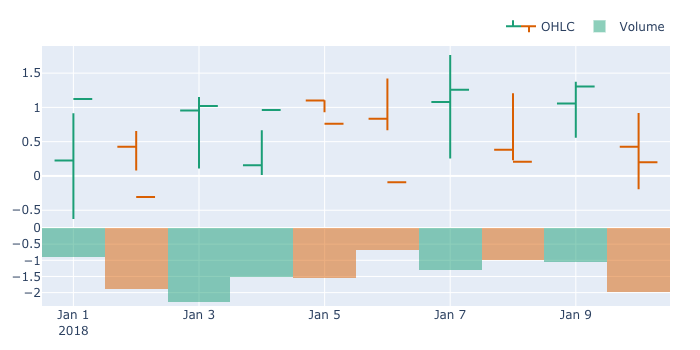

In [8]:
# Specify them manually
ohlcv_ts.vbt.ohlcv(column_names={
    'open': 'open', 
    'high': 'high', 
    'low': 'low', 
    'close': 'close', 
    'volume': 'volume'
}).plot().show_png()

In [9]:
# Or by changing the defaults
vbt.settings.ohlcv['column_names'] = {
    'open': 'open', 
    'high': 'high', 
    'low': 'low', 
    'close': 'close', 
    'volume': 'volume'
}

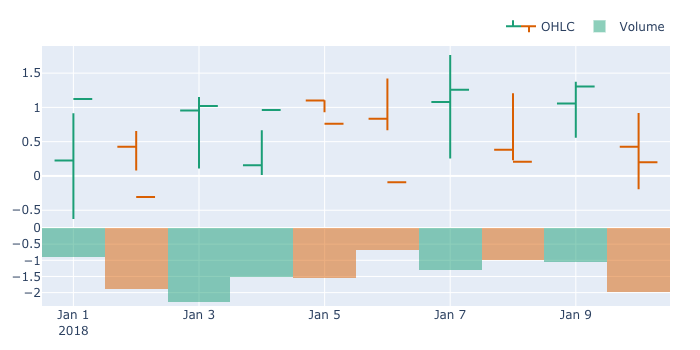

In [10]:
ohlcv_ts.vbt.ohlcv.plot().show_png()